# Word Cloud Using Python

## What is a word cloud ?

Word cloud is an image generated on the basis of word frequency to create amazing and unique word cloud art with ease.

In this project, we create ad "word cloud" from a text by writing a script.This script processes the text, removes punctuation, ignore case and words that do not contain all alphabets, count the frequencies, and ignore uninteresting or irrelevant words.

A dictionary is the output of the `calculate_frequencies` function.  The `wordcloud` module will then generate the image from your dictionary.

## Prequisites :

For the input text of your script, you will need to provide a file that contains text only.
For the text itself, you can copy and paste the contents of a website you like.  Or you can use a site like [Project Gutenberg](https://www.gutenberg.org/) to find books that are available online.  You could see what word clouds you can get from famous books, like a Shakespeare play or a novel by Jane Austen. Save this as a .txt file somewhere on your computer.
<br><br>
**NOTE:** We have used *test_file.txt* as input for this notebook.
<br><br>
Now we need to upload input file so that we will be able to process it. To do the upload, we have used an uploader widget. Run the following cell to perform all the installs and imports for your word cloud script and uploader widget. It may take a minute for all of this to run and there will be a lot of output messages. But, be patient. Once you get the following final line of output, the code is done executing. Then we can continue on with the rest of the instructions for this notebook.
<br><br>
**Enabling notebook extension fileupload/extension...**
<br>
**- Validating: <font color =green>OK</font>**

In [17]:
# Here are all the installs and imports needed for your word cloud script and uploader widget

!pip3 install wordcloud
!pip3 install fileupload
!pip3 install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Installing /home/aditya/.local/lib/python3.8/site-packages/fileupload/static -> fileupload
Up to date: /home/aditya/.local/share/jupyter/nbextensions/fileupload/extension.js
Up to date: /home/aditya/.local/share/jupyter/nbextensions/fileupload/widget.js
Up to date: /home/aditya/.local/share/jupyter/nbextensions/fileupload/fileupload/widget.js
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: OK


All of the installs and imports for your word cloud script and uploader widget have been completed. 
<br><br>
To upload the text file, run the following cell that contains all the code for a custom uploader widget. Once you run this cell, a "Browse" button should appear below it. Click this button and navigate the window to locate your saved text file.

In [19]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

The uploader widget saved the contents of your uploaded file into a string object named *file_contents* that your word cloud script can process. This was a lot of preliminary work, but now we are ready. 

Here, we have first filtered out unnecessary words and punctations to make the word cloud look more aesthetic. You can add more words to *uninteresting_words* list to avoid any word appear in the wordcloud.

In [5]:
def clearPunctuation(word):
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for punc in punctuations:
        while(punc in word):
            index = word.index(punc)
            word = word[:index]+word[index+1:]
            
    return word        
    
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    # LEARNER CODE START HERE
    list_new = {}
    words = file_contents.split()
    for word in words:
        word = clearPunctuation(word)
        if(word not in uninteresting_words):
            if(word not in list_new):
                list_new[word] = 0;
            list_new[word] += 1;
    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(list_new)
    return cloud.to_file("myfile.jpg")

If you have done everything correctly, your word cloud image should appear after running the cell below.  Fingers crossed!

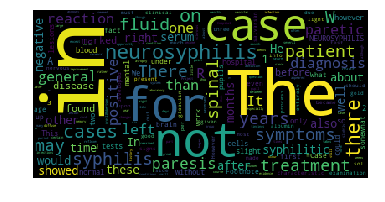

In [6]:
# Your word-cloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()

Now you can use this as your wallpaper for your social-media handles or desktop background.

### PEACE!